---
Name: Ziqi Xuan, Xinshou Zheng, Jingyang Zhang
---

## Background

This dataset is derived from the World Happiness Report, an annual publication of the United Nations Sustainable Development Solutions Network which contains rankings of national happiness and analysis of the data from various perspectives. The rankings of national happiness are based on respondent ratings of their own lives, which the report correlates with various (subjective and objective) life factors.

The data in the World Happiness Report is collected from the Gallup World Poll, an ongoing research project carried out by Gallup, which surveys people in more than 150 countries, in over 140 languages, to provide a comprehensive, annual measurement of well-being worldwide.

The World Happiness Report uses these data points to rank countries by their "happiness" level, assessed by variables like GDP per capita, social support, healthy life expectancy at birth, freedom to make life choices, generosity, perceptions of corruption, positive affect, and negative affect.

The purpose of the World Happiness Report is to provide another tool for governments, organizations, and civil society to improve their countries' well-being. The report continues to gain global recognition as governments, organizations, and civil society increasingly use happiness indicators to inform their policy-making decisions.

------

**Data description**: This dataset offers a comprehensive overview of various facets of national well-being and economic status from 2005 to 2022. It includes records for many countries worldwide, capturing significant metrics that encapsulate the quality of life experienced by the populations within these nations. The dataset does not cover all countries and territories due to various reasons, including data availability and response rates. The underlying principle in the data compilation is to use the largest available sample for every analysis, leading to a more inclusive and comprehensive understanding of global happiness and well-being trends.

The dataset contains several key indicators:

Variable name | Description 
--------------|--------------
`Country name` | This represents the name of the country for which the data is presented.
`year` | This represents the year in which the data was collected or is applicable.
`Life Ladder (Happiness score or subjective well-being)` | This is the national average response to the question of life evaluations, where respondents are asked to imagine a ladder with steps numbered from 0 at the bottom to 10 at the top, indicating which step they feel they stand at that time.
`Log GDP per capita` | This is the logarithm of the Gross Domestic Product per capita, reflecting the average economic output per person, adjusted for purchasing power parity and expressed in constant 2017 international dollars.
`Social support` | This is the national average of binary responses to the question of whether people have relatives or friends they can count on to help them in times of trouble.
`Healthy life expectancy at birth` | This represents the average number of years a newborn is expected to live in "full health", based on current rates of illness and mortality.
`Freedom to make life choices` | This is the national average of responses to the question of whether individuals are satisfied or dissatisfied with their freedom to choose what they do with their lives.
`Generosity` | This is derived from responses to the question of whether an individual has donated money to a charity in the past month, with the influence of GDP per capita removed (residual of regression).
`Perceptions of corruption` | This measure reflects the national average of survey responses to two questions: "Is corruption widespread throughout the government or not" and "Is corruption widespread within businesses or not?"
`Positive affect` | This is an average measure of three positive emotional states (laughter, enjoyment, and interest) based on responses to questions about whether respondents experienced these states a lot during the previous day.
`Negative affect` | This is an average measure of three negative emotional states (worry, sadness, and anger) based on responses to questions about whether respondents experienced these states a lot during the previous day.

In [11]:
import otter
import numpy as np
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/whr-2023.csv')
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


----
Question of Interest
----

---
What kind of trends in national happiness with respect to social support and Log GDP per capita in time?
---

<font size="4">This question is motivated by a desire to understand the complex relationships between economic conditions, social support, and subjective well-being. We hypothesize that both economic conditions, as represented by Log GDP per capita, and social support significantly impact the perceived happiness of nations. It will be interesting to explore whether these relationships have evolved over time and how they differ among nations with varying economic conditions.</font>

<font size="4">A satisfactory answer should identify the trends in national happiness, social support, and Log GDP per capita over time. Analyze the correlation between these trends to see if and how national happiness is associated with social support and Log GDP per capita. Describe how these relationships have evolved over time and comparing them among nations with different economic and social conditions.</font>

<font size="4">Firstly, we deal with the missing value.</font>

In [12]:
# check for missing value
data.isnull().mean()

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.009095
Social support                      0.005912
Healthy life expectancy at birth    0.024557
Freedom to make life choices        0.015007
Generosity                          0.033197
Perceptions of corruption           0.052751
Positive affect                     0.010914
Negative affect                     0.007276
dtype: float64

In [13]:
# since the portion of missing value is small, we will just drop it.

data = data.dropna()
data.isnull().mean()

Country name                        0.0
year                                0.0
Life Ladder                         0.0
Log GDP per capita                  0.0
Social support                      0.0
Healthy life expectancy at birth    0.0
Freedom to make life choices        0.0
Generosity                          0.0
Perceptions of corruption           0.0
Positive affect                     0.0
Negative affect                     0.0
dtype: float64

<font size="4">We begin to group the data by the level of Log GDP per capita and social support.</font>

In [14]:

alt.data_transformers.disable_max_rows()

data = pd.read_csv('data/whr-2023.csv')
data = data[['Country name', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support']]

data


low_threshold_log = np.log(2000)
high_threshold_log = np.log(25000)

# Create a new column 'GDP_Category'
data['GDP_Category'] = 2.0 # Default to mid
data.loc[data['Log GDP per capita'] < low_threshold_log, 'GDP_Category'] = 1.0 # low
data.loc[data['Log GDP per capita'] > high_threshold_log, 'GDP_Category'] = 3.0 # High

support_low_threshold = 0.5
support_high_threshold = 0.85

# Create a new column 'GDP_Category'
data['Social_support_Category'] = 2.0 # Default to mid
data.loc[data['Social support'] < support_low_threshold, 'Social_support_Category'] = 1.0 # low
data.loc[data['Social support'] > support_high_threshold, 'Social_support_Category'] = 3.0 # High

data


,Country name,year,Life Ladder,Log GDP per capita,Social support,GDP_Category,Social_support_Category
0,Afghanistan,2008,3.724,7.350,0.451,1.0,1.0
1,Afghanistan,2009,4.402,7.509,0.552,1.0,2.0
2,Afghanistan,2010,4.758,7.614,0.539,2.0,2.0
3,Afghanistan,2011,3.832,7.581,0.521,1.0,2.0
4,Afghanistan,2012,3.783,7.661,0.521,2.0,2.0
...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,2.0,2.0
2195,Zimbabwe,2019,2.694,7.698,0.759,2.0,2.0
2196,Zimbabwe,2020,3.160,7.596,0.717,1.0,2.0
2197,Zimbabwe,2021,3.155,7.657,0.685,2.0,2.0


<font size="4">Then we plot the change of number of country in different GDP per capita groups for each year.</font>

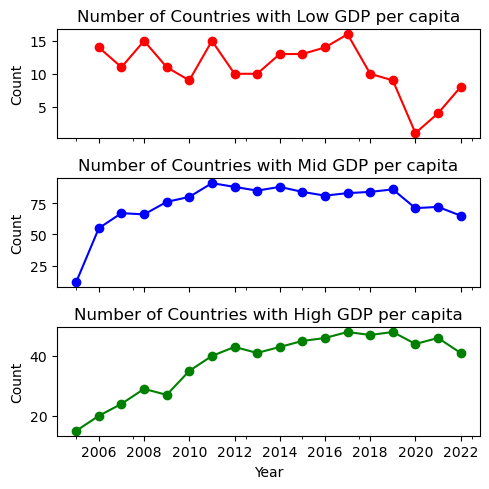

In [15]:
# Group the data by year and 'GDP_Category' and count the number of countries in each group for each year
gdp_counts = data.groupby(['year', 'GDP_Category'])['Country name'].count().unstack()

# Create separate charts for each GDP_Category group using line graphs
fig, axes = plt.subplots(3, 1, figsize=(5, 5), sharex=True)

# Plotting for GDP_Category = 1.0 (Low GDP)
gdp_counts[1.0].plot(kind='line', ax=axes[0], color='red', marker='o')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Countries with Low GDP per capita')

# Plotting for GDP_Category = 2.0 (Mid GDP)
gdp_counts[2.0].plot(kind='line', ax=axes[1], color='blue', marker='o')
axes[1].set_ylabel('Count')
axes[1].set_title('Number of Countries with Mid GDP per capita')

# Plotting for GDP_Category = 3.0 (High GDP)
gdp_counts[3.0].plot(kind='line', ax=axes[2], color='green', marker='o')
axes[2].set_ylabel('Count')
axes[2].set_title('Number of Countries with High GDP per capita')

# Convert the x-axis to integers
axes[2].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Year')
plt.tight_layout()
plt.show()



<font size="4">Then we plot the change of number of country in different social groups for each year.</font>

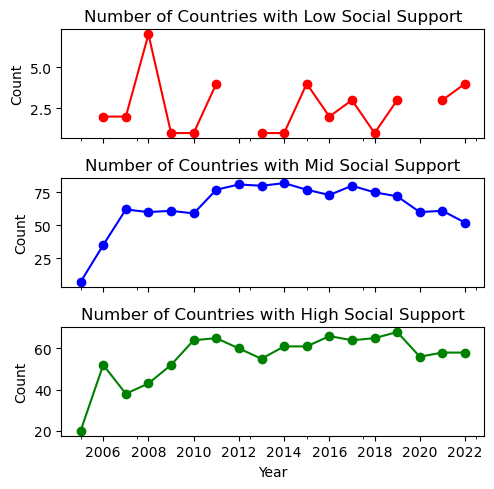

In [16]:
support_counts = data.groupby(['year', 'Social_support_Category'])['Country name'].count().unstack()

# Create separate charts for each Social Support Category group using line graphs
fig, axes = plt.subplots(3, 1, figsize=(5, 5), sharex=True)

# Plotting for Social_support_Category = 1.0 (Low Social Support)
support_counts[1.0].plot(kind='line', ax=axes[0], color='red', marker='o')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Countries with Low Social Support')

# Plotting for Social_support_Category = 2.0 (Mid Social Support)
support_counts[2.0].plot(kind='line', ax=axes[1], color='blue', marker='o')
axes[1].set_ylabel('Count')
axes[1].set_title('Number of Countries with Mid Social Support')

# Plotting for Social_support_Category = 3.0 (High Social Support)
support_counts[3.0].plot(kind='line', ax=axes[2], color='green', marker='o')
axes[2].set_ylabel('Count')
axes[2].set_title('Number of Countries with High Social Support')

# Convert the x-axis to integers
axes[2].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Year')
plt.tight_layout()
plt.show()

<font size="4">We now start correlation analysis.</font>

In [17]:
# correlation analysis
# Split the data
df_low = data[data['GDP_Category'] == 1.0]
df_mid = data[data['GDP_Category'] == 2.0]
df_high = data[data['GDP_Category'] == 3.0]


def melt_corr(df, title):
    corr = df[['Life Ladder', 'Log GDP per capita', 'Social support']].corr().reset_index().melt('index')
    corr.columns = ['variable', 'index', 'value']
    corr['title'] = title
    return corr

# Apply the function to your three datasets
corr_low = melt_corr(df_low, 'Low GDP Category')
corr_mid = melt_corr(df_mid, 'Mid GDP Category')
corr_high = melt_corr(df_high, 'High GDP Category')

# Concatenate the three datasets
corr = pd.concat([corr_low, corr_mid, corr_high])

# Create an Altair chart
heatmap = alt.Chart(corr).mark_rect().encode(
    x='index',
    y='variable',
    color=alt.Color('value:Q', scale=alt.Scale(scheme='blueorange', domain=(-0.5, 1)), 
                    legend=alt.Legend(values=[1, 0.5, 0, -0.5])),
    facet=alt.Facet('title', title='', columns=3),
).properties(width = 200, height = 200, title='Correlation Heatmaps for Different GDP Categories')

heatmap


alt.Chart(...)

* **Low GDP Category**: In these countries, there is no strong correlation between GDP and the Life Ladder score or Social support. In fact, the correlation between GDP and Life Ladder score is slightly negative. The strongest relationship seen here is a moderate positive correlation between Life Ladder and Social support, which implies that in these nations, societal support has a greater impact on overall happiness than does GDP.

* **Mid GDP Category**: For nations within this category, there is a positive correlation between GDP and both the Life Ladder score and Social support, suggesting that as the GDP increases, there's generally an increase in the overall happiness (Life Ladder) and Social support.

* **High GDP Category**: Among these nations, there remains a positive correlation between GDP and Life Ladder score, similar to the mid GDP countries. However, the correlation between GDP and Social support is notably weaker, indicating that higher GDP doesn't necessarily equate to higher social support in these countries.


In [18]:
# Split the data
df_low = data[data['Social_support_Category'] == 1.0]
df_mid = data[data['Social_support_Category'] == 2.0]
df_high = data[data['Social_support_Category'] == 3.0]


def melt_corr(df, title):
    corr = df[['Life Ladder', 'Log GDP per capita', 'Social support']].corr().reset_index().melt('index')
    corr.columns = ['variable', 'index', 'value']
    corr['title'] = title
    return corr

# Apply the function to your three datasets
corr_low = melt_corr(df_low, 'Low Social support')
corr_mid = melt_corr(df_mid, 'Mid Social support')
corr_high = melt_corr(df_high, 'High Social support')

# Concatenate the three datasets
corr = pd.concat([corr_low, corr_mid, corr_high])

# Create an Altair chart
heatmap = alt.Chart(corr).mark_rect().encode(
    x='index',
    y='variable',
    color=alt.Color('value:Q', scale=alt.Scale(scheme='blueorange', domain=(0, 1)), 
                    legend=alt.Legend(values=[1, 0.66, 0.33, 0])),
    facet=alt.Facet('title', title='', columns=3),
).properties(width = 200, height = 200, title='Correlation Heatmaps for Different Social_support_Category')

heatmap

alt.Chart(...)

* **Low Social Support**: In these regions, both GDP and Life Ladder scores are moderately correlated with social support. The correlation between GDP and the Life Ladder score is slightly higher, suggesting that in low social support environments, GDP might have a bit more impact on life satisfaction.

* **Mid Social Support**: Here we see stronger correlations. GDP is more strongly correlated with the Life Ladder score compared to social support, suggesting that in these environments, an increase in GDP could potentially contribute more to life satisfaction than an equivalent increase in social support.

* **High Social Support**: Interestingly, in environments with high social support, the correlation between GDP and Life Ladder score is quite strong. However, while social support is still positively correlated with Life Ladder score, this correlation is weaker than the one seen in the mid social support environment. This could suggest that in high social support environments, GDP might play a more significant role in life satisfaction than social support does. Additionally, the correlation between GDP and social support is the weakest among all, implying that a high level of social support does not necessarily go hand-in-hand with high GDP.



<font size="4">We now find the relationship between Life Ladder and Log GDP per capita.</font>

In [19]:

chart = alt.Chart(data).mark_point().encode(
    x= alt.X('Log GDP per capita:Q', scale= alt.Scale(zero = False)),
    y= alt.Y('Life Ladder:Q', scale = alt.Scale(zero = False)),
    color='GDP_Category:N',  # Coloring points by GDP Category

).properties(
    title='Relationship between Life Ladder and Log GDP per capita'
)


chart.display()

alt.Chart(...)

<font size="4">We now find the relationship between Life Ladder and Social support.</font>

In [20]:
chart = alt.Chart(data).mark_point().encode(
    x= alt.X('Social support:Q', scale= alt.Scale(zero = False)),
    y= alt.Y('Life Ladder:Q', scale = alt.Scale(zero = False)),
    color='Social_support_Category:N', 
    
).properties(
    title='Relationship between Life Ladder and Social support'
)

chart.display()

alt.Chart(...)

----
Summary of findings
----


* **Correlation analysis**: Based on the correlation analysis of the World Happiness Report dataset, suggests that while GDP and Social support tend to correlate with Life Ladder across different GDP categories, their relationships vary significantly. In particular, the role of GDP appears to be less important in low GDP countries, while Social support plays a consistently significant role across all GDP categories in contributing to the Life Ladder. This suggests that efforts to improve national happiness should consider not only economic development but also strategies to enhance social support, particularly in low and high GDP countries. And, as we move from low to high social support environments, the impact of GDP on life satisfaction tends to increase. However, high levels of social support don't necessarily mean high GDP, and while social support is important, its correlation with life satisfaction appears to decrease in high social support environments.

_______


Analysis of the World Happiness Report dataset reveals interesting trends in the relationship between national happiness, social support, and logarithm of GDP per capita. The findings suggest that these factors play different roles in different economic and social contexts.

In countries with lower GDP, the link between GDP and life ladder scores is weaker and even slightly negative. However, social support showed a moderately positive relationship with life ladder. This suggests that the availability of social support contributes more to overall well-being than economic prosperity in these countries. For countries with an intermediate GDP, both GDP and social support are positively correlated with life ladder scores. As GDP increases, so does overall happiness and social support. This suggests that economic growth and a supportive social environment synergistically promote higher levels of well-being. In high-GDP countries, the positive relationship between GDP and life ladder scores persists, but the link between GDP and social support weakens. This suggests that while economic prosperity still affects well-being, its effect on social support is somewhat weaker in these settings.

Regarding the role of social support, both GDP and life ladder scores showed moderate correlations with social support in low social support environments. In this case, GDP has a slightly larger effect on life satisfaction. In the context of moderate levels of social support, the correlation between GDP and life ladder scores is stronger than that of social support, suggesting that economic development may be more influential. Interestingly, the correlation between GDP and life ladder scores remained strong in high social support environments, and while social support was positively associated with happiness, this correlation was weaker than in moderate support environments. This means that GDP may play a more important role in determining life satisfaction in the context of high social support.

In conclusion, trends in national happiness suggest that while both economic development (GDP) and social support contribute to life satisfaction, their importance varies across economic and social contexts. Efforts to improve well-being should take this delicate relationship into account, emphasizing strategies to enhance social support alongside economic growth, especially in countries with low GDP. The intricate interplay of these factors highlights the complexity of promoting greater happiness at the national level.